# Task - 4: Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

Dataset: Dataset :-  https://www.kaggle.com/gti-upm/leapgestrecog


## Content
 
The database is composed by 10 different hand-gestures that were performed by 10 different sunjects (5 men and 5 women)

In [89]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
# from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

In [65]:
# pip install keras

In [66]:
# !pip install tensorflow


In [67]:
Categories = ["01_palm", "02_l", "03_fist", "04_fist_moved", "05_thumb", "06_index", "07_ok", "08_palm_moved", "09_c", "10_down"]
img_size = 50

data_path = "dataset/leapGestRecog/leapGestRecog"
# data_path = "C:/Users/ayush/OneDrive/Internships/ProDigy/Task - 4/dataset/leapGestRecog"

### Load the Data

In [68]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in Categories:
        class_index = Categories.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                # print("hi")
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (img_size, img_size)), class_index])
            except Exception as e:
                pass



In [69]:
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [70]:
# Shuffle the input data
import random
random.shuffle(image_data)

In [71]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [72]:
label[:10]

[5, 7, 3, 2, 2, 5, 8, 2, 9, 8]

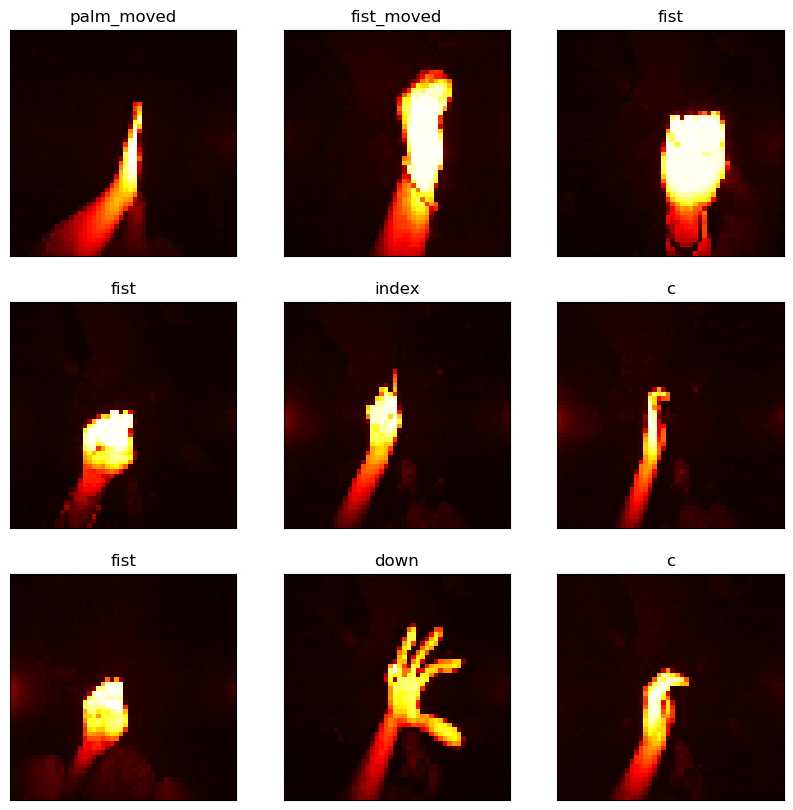

In [73]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap = "hot")
    plt.xticks([])
    plt.yticks([])
    plt.title(Categories[label[i]][3:])


In [74]:
# Mormalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [75]:
import tensorflow as tf

In [76]:
# One hot Encoding
label = tf.keras.utils.to_categorical(label)

In [77]:
label = label.astype("i1")

In [78]:
label[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [79]:
# Reshaping the data
input_data.shape = (-1,img_size, img_size, 1)

In [80]:
# Splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.3, random_state=0)

### The Model

In [81]:
model = keras.models.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(img_size, img_size, 1)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [82]:
model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 51s 110ms/step - accuracy: 0.7046 - loss: 0.8606 - val_accuracy: 0.9938 - val_loss: 0.0220
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy: 0.9985 - val_loss: 0.0037
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 48s 110ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.9973 - loss: 0.0068 - val_accuracy: 0.9998 - val_loss: 1.9954e-04
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.9986 - loss: 0.0047 - val_accuracy: 0.9872 - val_loss: 0.0477
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 46s 106ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.9995 - val_loss: 0.0012
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9997 - val_loss: 8.6356e-04


In [83]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

None


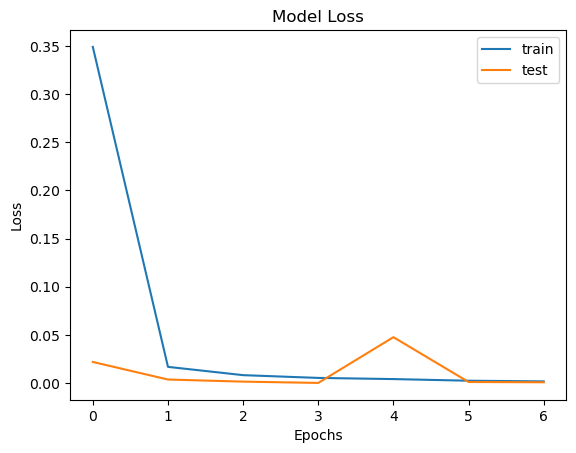

In [84]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

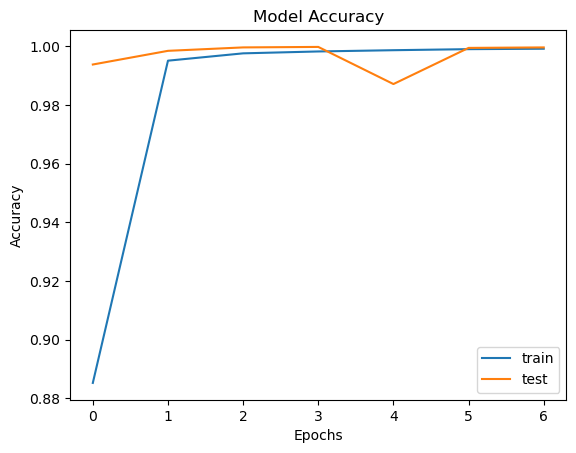

In [85]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [86]:
# Calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:2.2f}%".format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9999 - loss: 3.3457e-04
Test accuracy: 99.97%


### Confusion Matrix

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step


[]

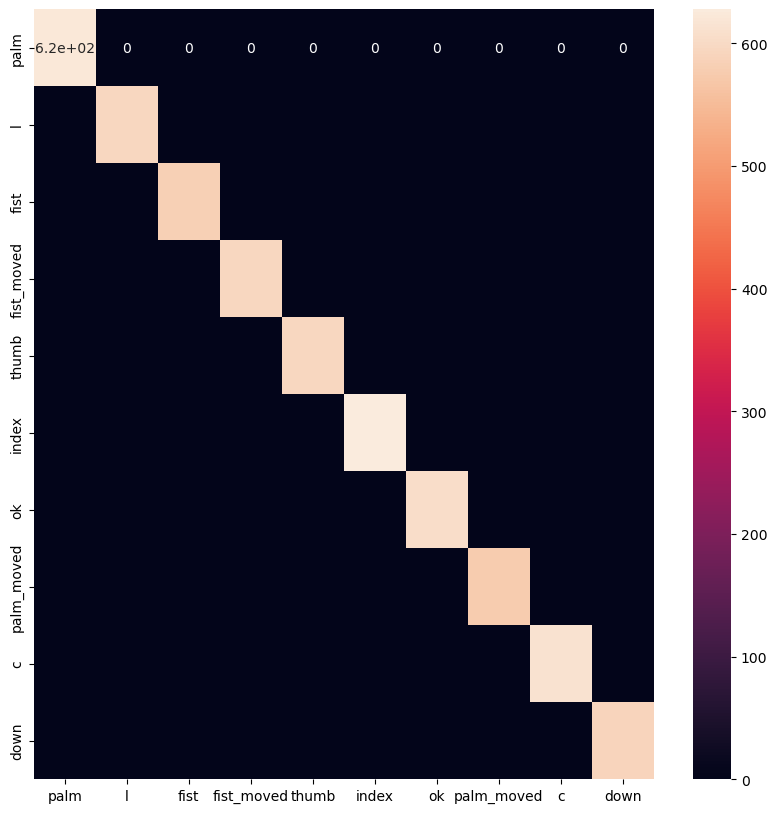

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cat = [c[3:] for c in Categories]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sns.heatmap(cm, annot=True, xticklabels=cat, yticklabels=cat)
plt.plot()